## Identify missing values: count missing values per column

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sandipshrestha/My Files/BIT-2020/python/DataSet/titanic.csv')

In [3]:
# Identify missing values and count them per column
missing_values_per_column = df.isna().sum()


In [4]:
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Evaluate the impact of missing data: analyze patterns, reasons for missingness.

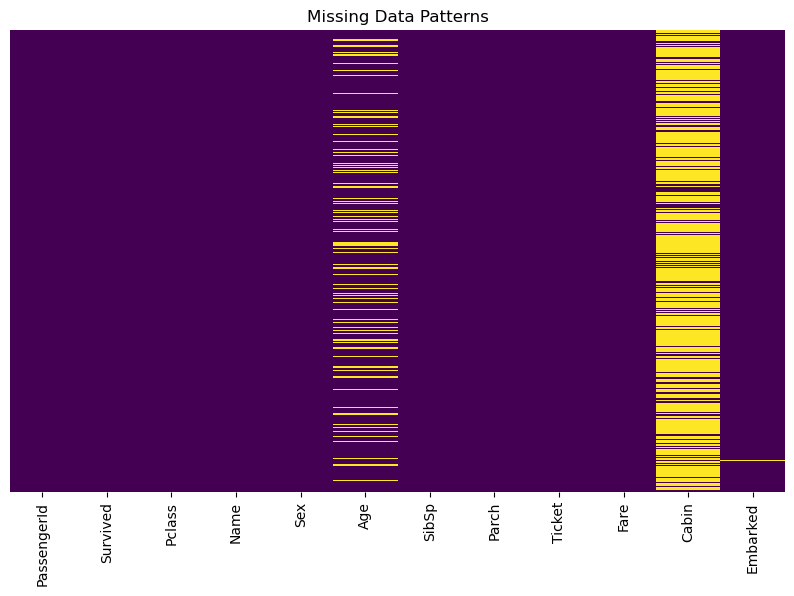

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Patterns')
plt.show()


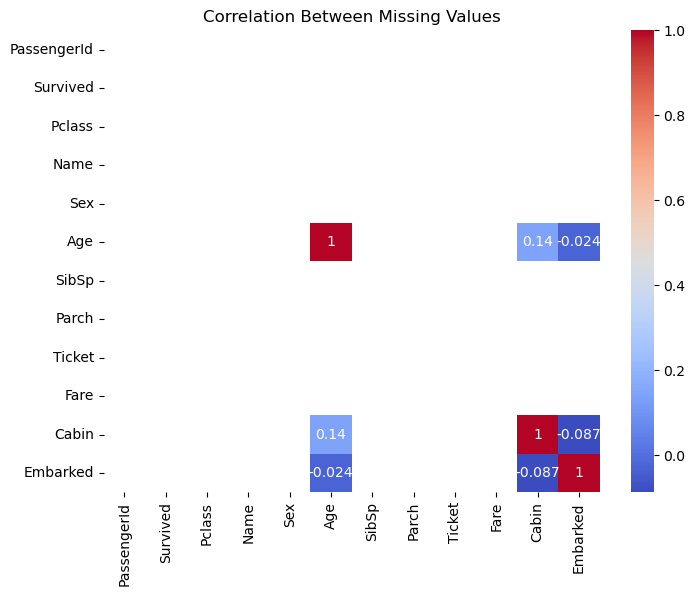

In [10]:
# Analyze correlations between missing values in different columns
missing_correlation = df.isnull().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Missing Values')
plt.show()

In [11]:
df1 = df.select_dtypes(include=['int64', 'float64'])

In [12]:
# Imputation
df[df1.columns] = df[df1.columns].fillna(df[df1.columns].mean())

In [15]:
# Display dataset after imputation
print("Dataset after imputation:")
print(df)

Dataset after imputation:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                         

In [16]:
# Deletion
df.dropna(inplace=True)

In [14]:
# Display dataset after deletion
print("\nDataset after deletion:")
print(df)


Dataset after deletion:
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                          

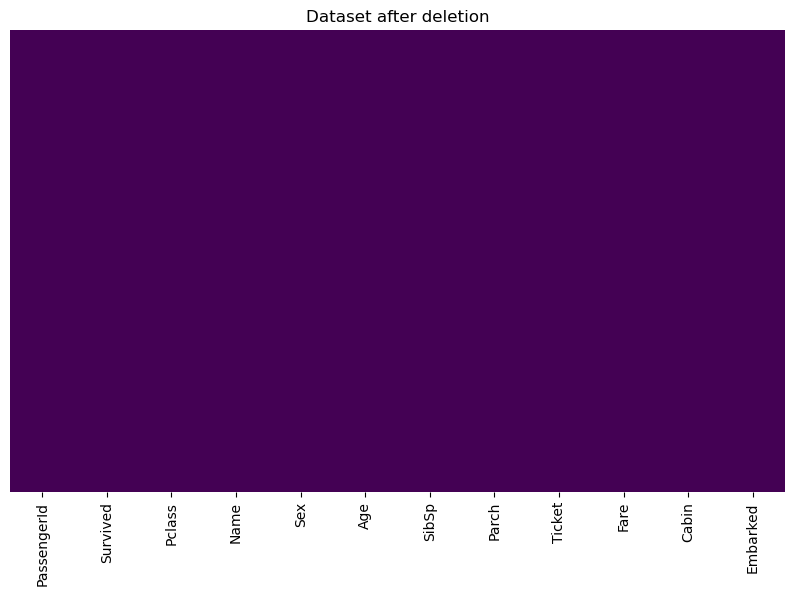

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Dataset after deletion')
plt.show()

In [19]:
# Import necessary libraries

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

## Implement chosen strategies: impute missing values using mean, median, mode, or advanced methods like regression.

In [20]:
# Impute missing values using mean
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df.select_dtypes(include=['int64', 'float64'])), columns=df.select_dtypes(include=['int64', 'float64']).columns)

# Impute missing values using median
median_imputer = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(median_imputer.fit_transform(df.select_dtypes(include=['int64', 'float64'])), columns=df.select_dtypes(include=['int64', 'float64']).columns)

# Impute missing values using mode
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(df.select_dtypes(include=['object'])), columns=df.select_dtypes(include=['object']).columns)

# Impute missing values using regression (advanced method)
# Here, we'll use linear regression to predict missing values based on other columns
regression_df = df.copy()
for column in regression_df.select_dtypes(include=['int64', 'float64']).columns:
    features = regression_df.dropna().drop([column], axis=1)
    target = regression_df.dropna()[column]
    missing = regression_df[column].isnull()
    if missing.sum() > 0:
        model = LinearRegression()
        model.fit(features, target)
        regression_df.loc[missing, column] = model.predict(regression_df.drop([column], axis=1).loc[missing])

# Display the imputed datasets
print("Dataset after imputing missing values using mean:")
print(df_mean_imputed)

print("\nDataset after imputing missing values using median:")
print(df_median_imputed)

print("\nDataset after imputing missing values using mode:")
print(df_mode_imputed)

print("\nDataset after imputing missing values using regression:")
print(regression_df)

Dataset after imputing missing values using mean:
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            2.0       1.0     1.0  38.0    1.0    0.0  71.2833
1            4.0       1.0     1.0  35.0    1.0    0.0  53.1000
2            7.0       0.0     1.0  54.0    0.0    0.0  51.8625
3           11.0       1.0     3.0   4.0    1.0    1.0  16.7000
4           12.0       1.0     1.0  58.0    0.0    0.0  26.5500
..           ...       ...     ...   ...    ...    ...      ...
197        872.0       1.0     1.0  47.0    1.0    1.0  52.5542
198        873.0       0.0     1.0  33.0    0.0    0.0   5.0000
199        880.0       1.0     1.0  56.0    0.0    1.0  83.1583
200        888.0       1.0     1.0  19.0    0.0    0.0  30.0000
201        890.0       1.0     1.0  26.0    0.0    0.0  30.0000

[202 rows x 7 columns]

Dataset after imputing missing values using median:
     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            2.0       1.0     1.0  38.0 

Summary statistics before imputation:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Comparison of distributions before and aft

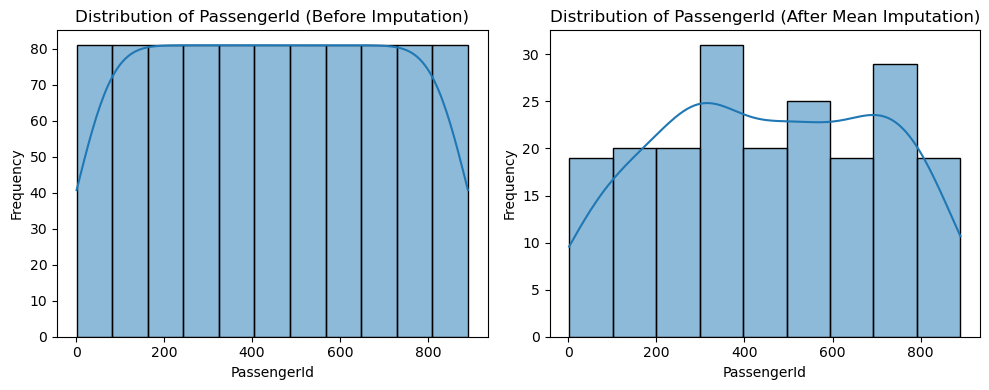

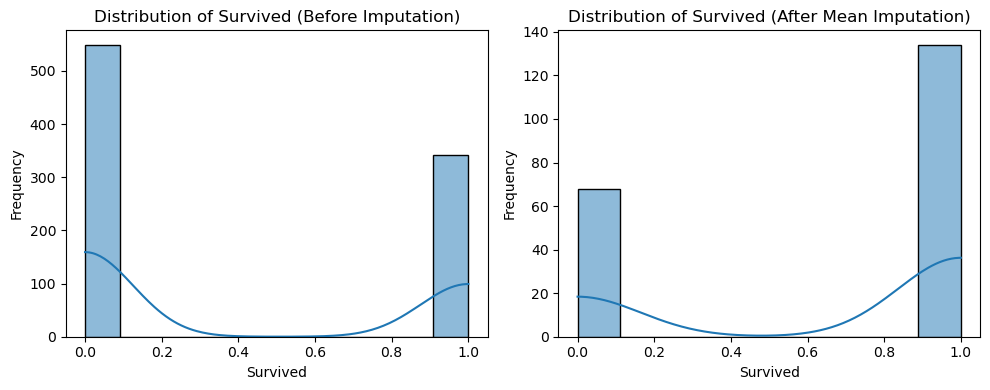

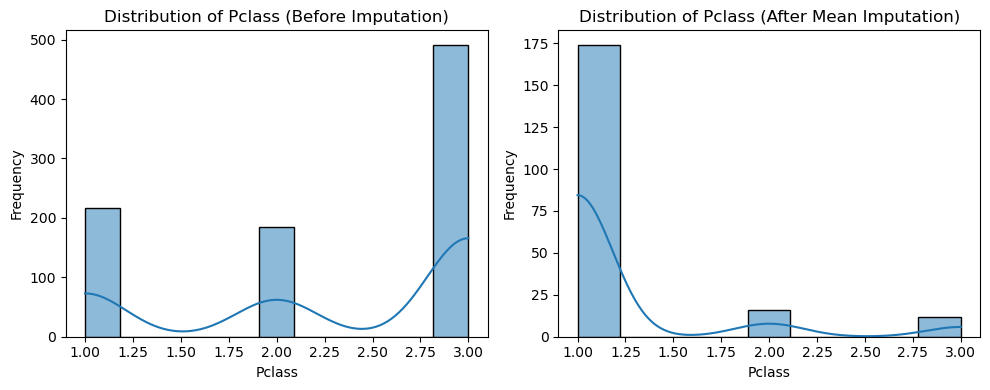

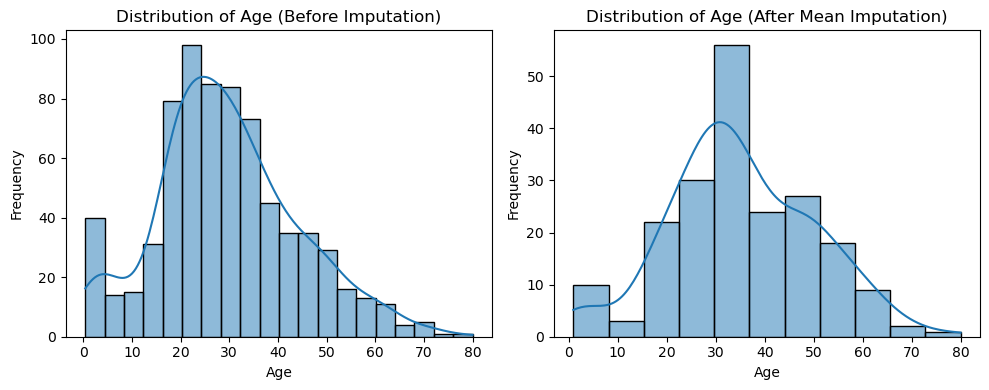

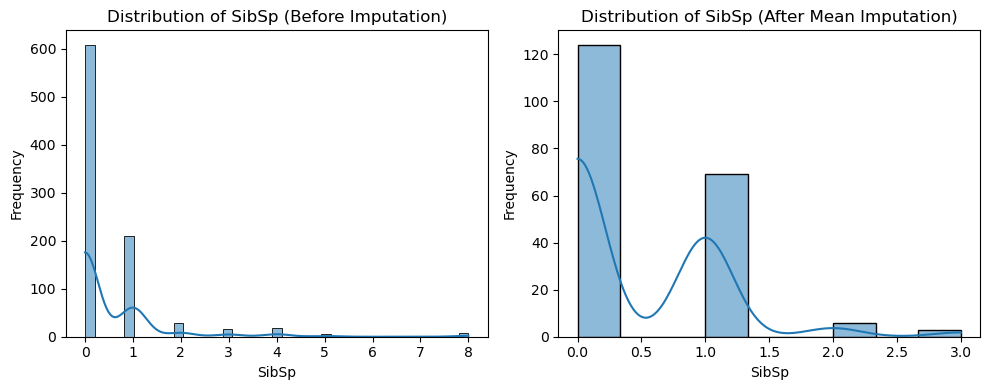

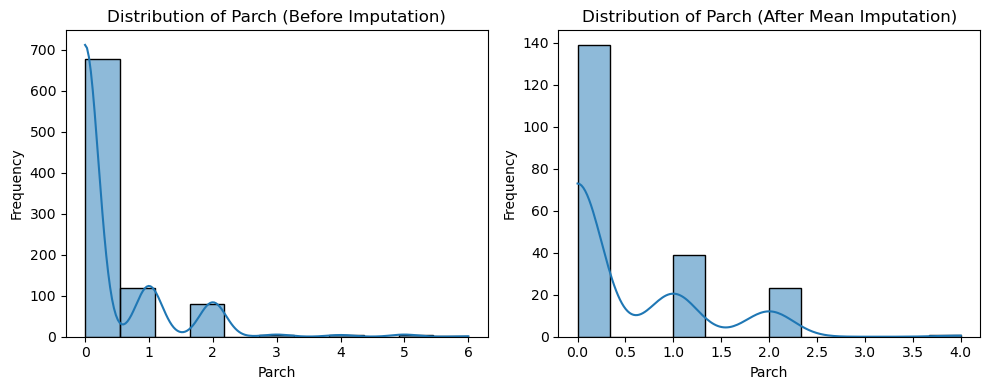

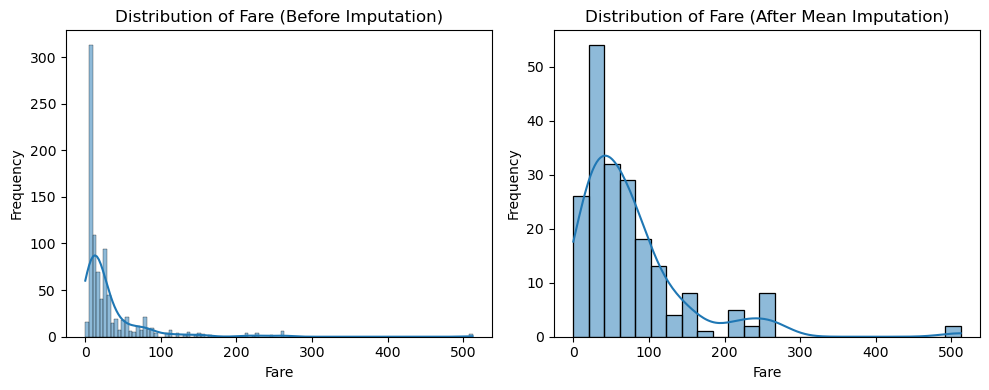

In [21]:
# Load the original Titanic dataset
df_original = pd.read_csv('/Users/sandipshrestha/My Files/BIT-2020/python/DataSet/titanic.csv')

# Calculate summary statistics for numerical columns before imputation
summary_stats_before = df_original.describe()

# Display summary statistics before imputation
print("Summary statistics before imputation:")
print(summary_stats_before)

# Compare distributions of numerical columns before and after imputation
print("\nComparison of distributions before and after imputation:")
for column in df_original.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[column].dropna(), kde=True)
    plt.title(f'Distribution of {column} (Before Imputation)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df_mean_imputed[column], kde=True)
    plt.title(f'Distribution of {column} (After Mean Imputation)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()